# Google Mobility Data

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

#### The original CSV file was 120Mb, the file was run locally and only the data for the US was extracted, reducing the file size. Due to the Git Hub file size limit, we proceeded to work only with the filtered data for the US. The original 120Mb file is located at: https://drive.google.com/drive/folders/1s_eZIQvMcqwpDXB31nuZfWNnKteSeu1Z?usp=sharing
#### This file should be copied in to the "Data" folder, in order for the whole program to run from the beginning, otherwise procceed to the cell where the reduced US file is loaded.


In [3]:
# The path to the CSV file
file = "../Data/Global_Mobility_Report.csv"

# Read our mobility data into pandas
# It is a big original file with total of 1648861 rows × 14 columns,low_memory=False is used to open it.
google_mob_df = pd.read_csv(file,low_memory=False)
google_mob_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648856,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-29,NaN,NaN,NaN,NaN,-18.0,NaN
1648857,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN
1648858,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-31,NaN,NaN,NaN,NaN,-46.0,NaN
1648859,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-03,NaN,NaN,NaN,NaN,-4.0,NaN


## Filter the data so that only the US in the data frame

In [4]:
# Selecting only the data for the US. This dropped the data to 456634 rows × 14 columns
google_mob_US_df = google_mob_df.loc[google_mob_df["country_region_code"] == "US"]
google_mob_US_df = google_mob_US_df.reset_index(drop = True)
google_mob_US_df

# Export the file so it can be loaded/uploaded 
google_mob_US_df.to_csv("../Data/Global_Mobility_Report_US.csv")
google_mob_US_df


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456629,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456630,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456631,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456632,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


#### US mobility .CSV file to load from the following cell:

In [2]:
 # Load the US mobility file, to avoid loading the Global file.
file_us = "../Data/Global_Mobility_Report_US.csv"
google_mob_US_df = pd.read_csv(file_us)
google_mob_US_df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


## Cleaning the US data

In [3]:
# Cleaning the data and droping columns that are not needed
clean_google_mob_US_df = google_mob_US_df.drop(["country_region_code",
                                                "sub_region_2",
                                                "Unnamed: 0",
                                                "country_region",
                                                "iso_3166_2_code",
                                                "census_fips_code",
                                                "metro_area"], axis = 1)
clean_google_mob_US_df.head(10)

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
5,NaN,2020-02-20,1.0,0.0,4.0,0.0,0.0,1.0
6,NaN,2020-02-21,2.0,-2.0,4.0,1.0,0.0,0.0
7,NaN,2020-02-22,7.0,3.0,23.0,5.0,4.0,-1.0
8,NaN,2020-02-23,7.0,3.0,23.0,5.0,2.0,-1.0
9,NaN,2020-02-24,2.0,1.0,9.0,1.0,3.0,0.0


In [4]:
# Renaming the columns
clean_google_mob_US_df.rename(columns = {"sub_region_1":"State",
                                         "retail_and_recreation_percent_change_from_baseline":"retail_and_recreation",
                                         "grocery_and_pharmacy_percent_change_from_baseline":"grocery_and_pharmacy",
                                         "parks_percent_change_from_baseline":"parks",
                                         "transit_stations_percent_change_from_baseline":"transit_stations",
                                         "workplaces_percent_change_from_baseline":"workplaces",
                                         "residential_percent_change_from_baseline":"residential"}, inplace = True)
clean_google_mob_US_df


,State,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
456629,Wyoming,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456630,Wyoming,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456631,Wyoming,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456632,Wyoming,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [5]:
# Check the df for NaN
clean_google_mob_US_df.columns[clean_google_mob_US_df.isna().any()].tolist()

['State',
 'retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']

In [6]:
# Look at rows that have the NA value in the 'retail_and_recreation' column
clean_google_mob_US_df[clean_google_mob_US_df['State'].isna()]

,State,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
167,NaN,2020-07-31,-14.0,-2.0,56.0,-28.0,-37.0,10.0
168,NaN,2020-08-01,-17.0,0.0,69.0,-20.0,-14.0,4.0
169,NaN,2020-08-02,-16.0,-4.0,52.0,-24.0,-17.0,3.0
170,NaN,2020-08-03,-12.0,-1.0,47.0,-31.0,-38.0,10.0


#### If we look at the number of rows in the previous df - there are 456634 rows × 9 columns - when we look at the rows that have the Nan (above) there is a total of 140845 rows × 9 columns - there is a lot of NaN values noted between April and August

In [7]:
clean_google_mob_US_df.dropna(subset=["State"], inplace = True)
clean_google_mob_US_df

,State,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
172,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
173,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
174,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
175,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
176,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...
456629,Wyoming,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456630,Wyoming,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456631,Wyoming,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456632,Wyoming,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [8]:
# Check the df for NaN
clean_google_mob_US_df.columns[clean_google_mob_US_df.isna().any()].tolist()

['retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential']

In [9]:
# Reseting the index and saving the cleaned file to csv
clean_google_mob_US_df = clean_google_mob_US_df.reset_index(drop = True)
clean_google_mob_US_df.to_csv("../Data/clean_google_mob_US.csv")

In [10]:
clean_google_mob_US_df

,State,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
1,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
2,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
3,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
4,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...
456457,Wyoming,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456458,Wyoming,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456459,Wyoming,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456460,Wyoming,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [11]:
# Grouping by date, so we can get all the data for all states into one date
# skipnabool, default is True, and all NA/null values are excluded, when computing the result.
data_by_date_df = pd.DataFrame(clean_google_mob_US_df.groupby("date").mean())
data_by_date_df.reset_index(inplace = True)
data_by_date_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2020-02-15,6.438490,2.379197,16.658416,4.307071,0.440225,-0.550276
1,2020-02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,2020-02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,2020-02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,2020-02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
...,...,...,...,...,...,...,...
167,2020-07-31,-3.338162,5.251713,68.145488,-3.857418,-28.497639,7.663490
168,2020-08-01,-4.665718,7.484454,81.304189,1.590763,-9.850601,2.382151
169,2020-08-02,-1.311211,4.662641,76.178253,0.365062,-12.422342,2.327806
170,2020-08-03,1.516552,7.114116,56.354717,-6.108588,-27.709433,7.375178


In [12]:
data_by_date_df["date"] = (data_by_date_df["date"].astype("datetime64")).dt.strftime("%m-%d")
data_by_date_df


,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,02-15,6.438490,2.379197,16.658416,4.307071,0.440225,-0.550276
1,02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
...,...,...,...,...,...,...,...
167,07-31,-3.338162,5.251713,68.145488,-3.857418,-28.497639,7.663490
168,08-01,-4.665718,7.484454,81.304189,1.590763,-9.850601,2.382151
169,08-02,-1.311211,4.662641,76.178253,0.365062,-12.422342,2.327806
170,08-03,1.516552,7.114116,56.354717,-6.108588,-27.709433,7.375178


In [13]:
start_date = "02-15"
end_date = "03-15"
mask = (data_by_date_df["date"] > start_date) & (data_by_date_df["date"] <= end_date)
first_month_df = data_by_date_df.loc[mask]
first_month_df.head()

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1,02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
5,02-20,0.178816,-0.153687,-1.258503,1.946819,-0.338327,1.141050


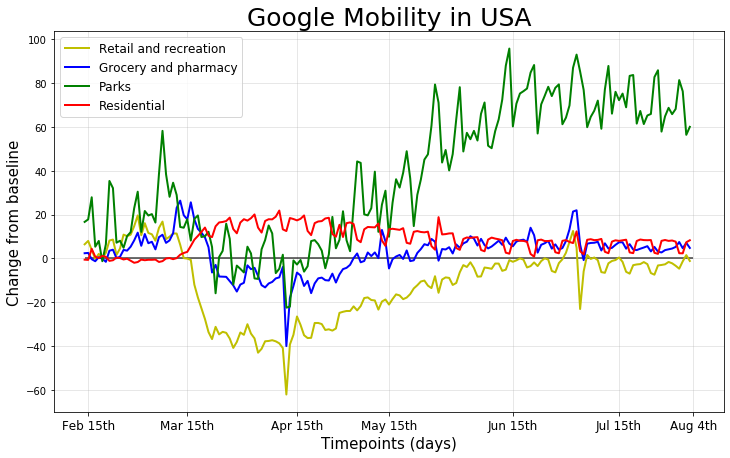

In [15]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["retail_and_recreation"],
         linewidth=2,
         c = "y", 
         label = "Retail and recreation")

plt.plot(data_by_date_df["date"], 
         data_by_date_df["grocery_and_pharmacy"],
         linewidth=2,
         c = "b",
         label = "Grocery and pharmacy")

plt.plot(data_by_date_df["date"], 
         data_by_date_df["parks"],
         linewidth=2, 
         c = "g",
         label = "Parks")

plt.plot(data_by_date_df["date"], 
         data_by_date_df["residential"],
         linewidth=2,
         c = "r",
         label = "Residential")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_all.png", dpi = 100)
plt.show()


### Creating the same graph using the moving average, to avoid the spikes.
### One of the findings, and the questions, is, how were people acting over the weekend during the quarantine, so the spikes are needed for one part of the analysis.

In [16]:
data_by_date_df["SMA retail_and_recreation"] = data_by_date_df.iloc[:,1].rolling(window=7).mean()
data_by_date_df["SMA grocery_and_pharmacy"] = data_by_date_df.iloc[:,2].rolling(window=7).mean()
data_by_date_df["SMA parks"] = data_by_date_df.iloc[:,3].rolling(window=7).mean()
data_by_date_df["SMA residential"] = data_by_date_df.iloc[:,6].rolling(window=7).mean()
data_by_date_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,SMA retail_and_recreation,SMA grocery_and_pharmacy,SMA parks,SMA residential
0,02-15,6.438490,2.379197,16.658416,4.307071,0.440225,-0.550276,NaN,NaN,NaN,NaN
1,02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800,NaN,NaN,NaN,NaN
2,02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513,NaN,NaN,NaN,NaN
3,02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469,NaN,NaN,NaN,NaN
4,02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
167,07-31,-3.338162,5.251713,68.145488,-3.857418,-28.497639,7.663490,-3.341547,4.113689,70.523736,6.420074
168,08-01,-4.665718,7.484454,81.304189,1.590763,-9.850601,2.382151,-2.950239,4.431486,70.326834,6.394371
169,08-02,-1.311211,4.662641,76.178253,0.365062,-12.422342,2.327806,-2.681935,4.656549,68.953456,6.427411
170,08-03,1.516552,7.114116,56.354717,-6.108588,-27.709433,7.375178,-2.040787,5.282463,68.742225,6.334869


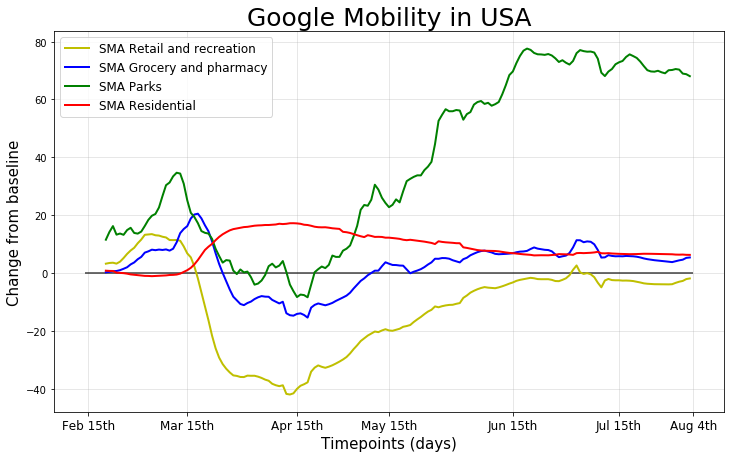

In [17]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["SMA retail_and_recreation"],
         linewidth=2,
         c = "y", 
         label = "SMA Retail and recreation")

plt.plot(data_by_date_df["date"], 
         data_by_date_df["SMA grocery_and_pharmacy"],
         linewidth=2,
         c = "b",
         label = "SMA Grocery and pharmacy")

plt.plot(data_by_date_df["date"], 
         data_by_date_df["SMA parks"],
         linewidth=2, 
         c = "g",
         label = "SMA Parks")

plt.plot(data_by_date_df["date"], 
         data_by_date_df["SMA residential"],
         linewidth=2,
         c = "r",
         label = "SMA Residential")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_all_using_SMA.png", dpi = 100)
plt.show()

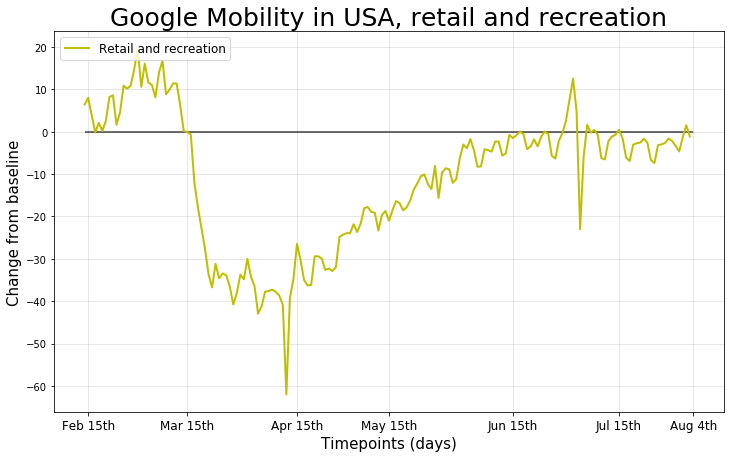

In [18]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["retail_and_recreation"],
         linewidth=2,
         c = "y", 
         label = "Retail and recreation")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA, retail and recreation", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_retail_recreation.png", dpi = 100)
plt.show()


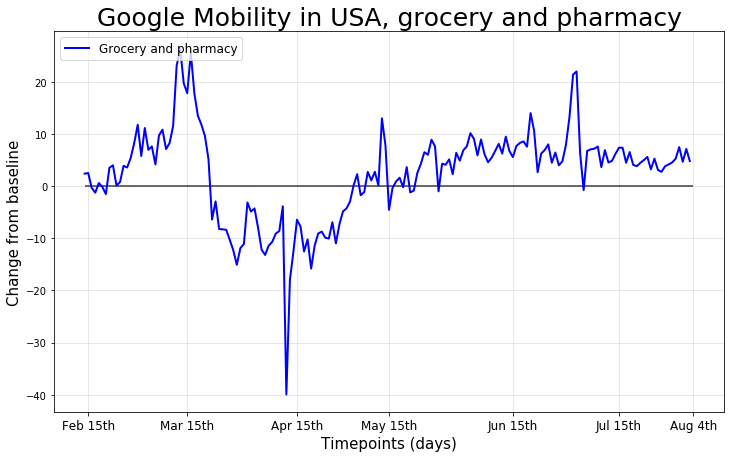

In [19]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["grocery_and_pharmacy"],
         linewidth=2,
         c = "b",
         label = "Grocery and pharmacy")


# Adding title, x labels and y labels
plt.title("Google Mobility in USA, grocery and pharmacy", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_grocery_and_pharmacy.png", dpi = 100)
plt.show()


In [20]:
# The data from apple is based on people destination searches, the data from google (this on) is based on the actual location
# One of the questions can be, what people searched on apple device and what actually happend, based on google data.

# Few limitations are.. i guess people dont search for places they know. 
# If im not going to work and i dont travel to new places, 
# since traveling was restricted
# i will go to places in my area and i will not use the search function... 
# also i will only search the first time and then i will know...



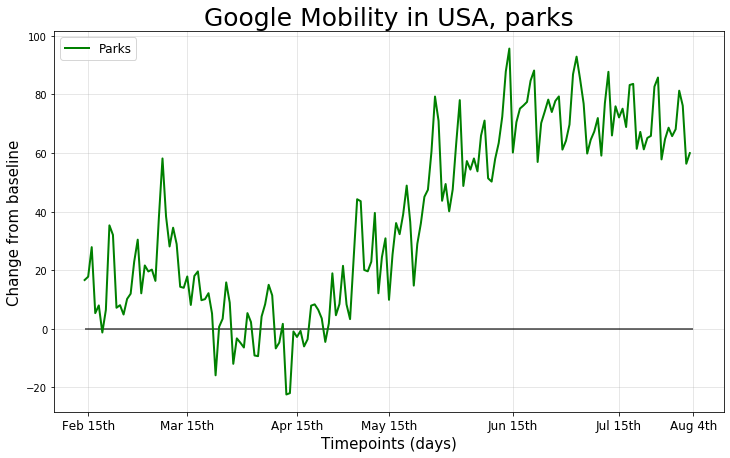

In [21]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["parks"],
         linewidth=2, 
         c = "g",
         label = "Parks")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA, parks", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_parks.png", dpi = 100)
plt.show()


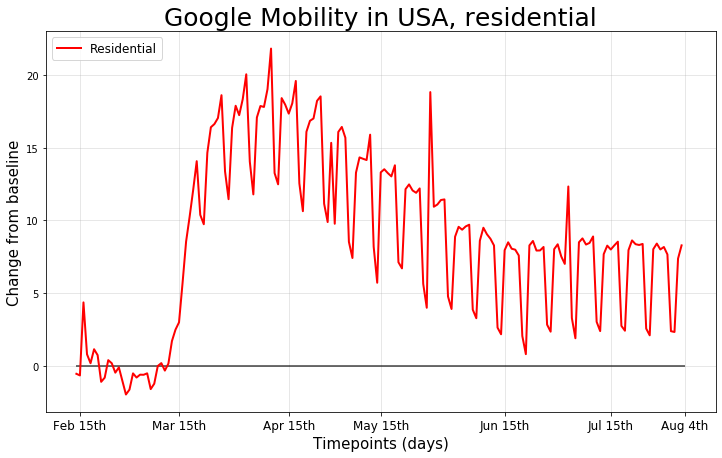

In [22]:
# The residential column can give answer to what extend people were following the stay at home guidelines
plt.plot(data_by_date_df["date"], 
         data_by_date_df["residential"],
         linewidth=2,
         c = "r",
         label = "Residential")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA, residential", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_residential.png", dpi = 100)
plt.show()



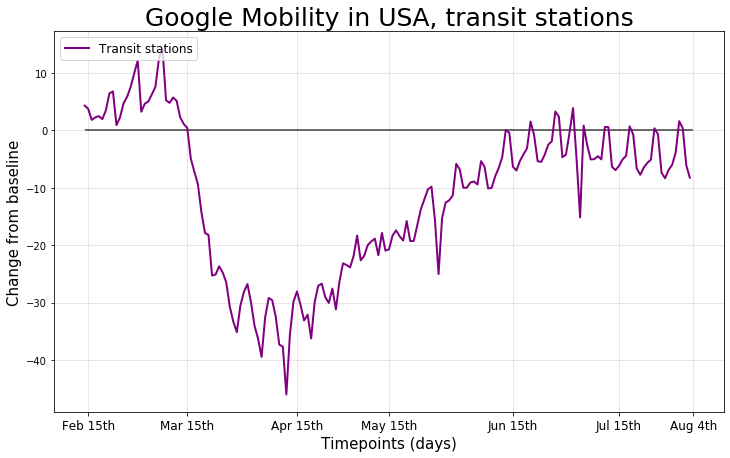

In [23]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["transit_stations"],
         linewidth=2,
         c = "purple",
         label = "Transit stations")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA, transit stations", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_transit_stations.png", dpi = 100)
plt.show()

In [24]:
start_date = "05-01"
end_date = "05-31"
mask = (data_by_date_df["date"] > start_date) & (data_by_date_df["date"] <= end_date)
may_month_df = data_by_date_df.loc[mask]
may_month_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,SMA retail_and_recreation,SMA grocery_and_pharmacy,SMA parks,SMA residential
77,05-02,-23.677076,2.276888,44.234177,-18.320408,-22.666971,8.533084,-24.925057,-3.989365,16.333974,13.109982
78,05-03,-21.702619,-1.754669,43.565485,-22.642259,-25.599428,7.420085,-23.463927,-2.671203,21.896225,12.756669
79,05-04,-18.048055,-1.151988,20.093604,-21.842654,-32.460957,13.287509,-22.497267,-1.793788,23.557680,12.462904
80,05-05,-17.754123,2.711811,19.635930,-19.976258,-33.889961,14.341912,-21.560289,-0.712844,23.290686,13.115319
81,05-06,-18.947054,1.088258,22.916399,-19.343896,-33.852647,14.246345,-20.845853,0.054995,25.376544,12.851801
82,05-07,-19.150576,2.742636,39.564924,-18.875468,-33.757337,14.159590,-20.159334,0.864162,30.557436,12.526191
83,05-08,-23.322034,0.135447,12.134831,-21.755898,-33.365907,15.905819,-20.371648,0.864055,28.877907,12.556335
84,05-09,-19.644102,12.981761,24.499305,-17.869436,-20.059763,8.197775,-19.795509,2.393322,26.058640,12.508434
85,05-10,-18.715944,7.787435,30.891654,-20.963077,-22.032243,5.716826,-19.368841,3.756480,24.248092,12.265111
86,05-11,-21.021374,-4.555035,9.898305,-20.731244,-30.839885,13.310395,-19.793601,3.270330,22.791621,12.268380


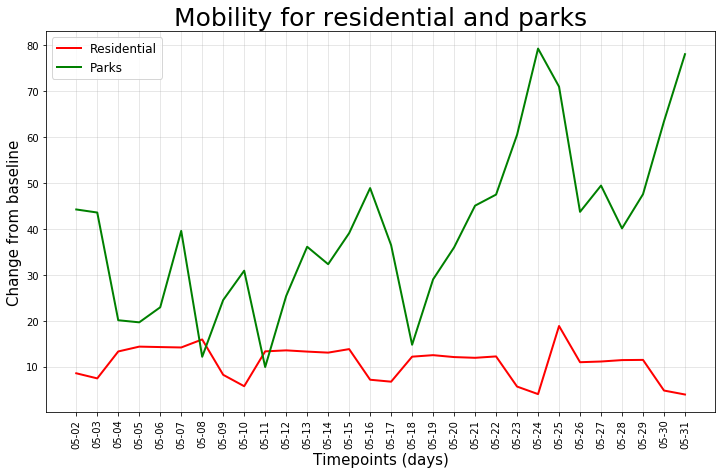

In [25]:
plt.plot(may_month_df["date"], 
         may_month_df["residential"],
         linewidth=2, label = "Residential", color="Red")

plt.plot(may_month_df["date"], 
         may_month_df["parks"],
         linewidth=2, label = "Parks", color="Green")


# Adding title, x labels and y labels
plt.title("Mobility for residential and parks", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.xticks(rotation=90)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.rcParams['figure.figsize'] = [12, 7]
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_residential_and_parks.png", dpi = 100)
plt.show()



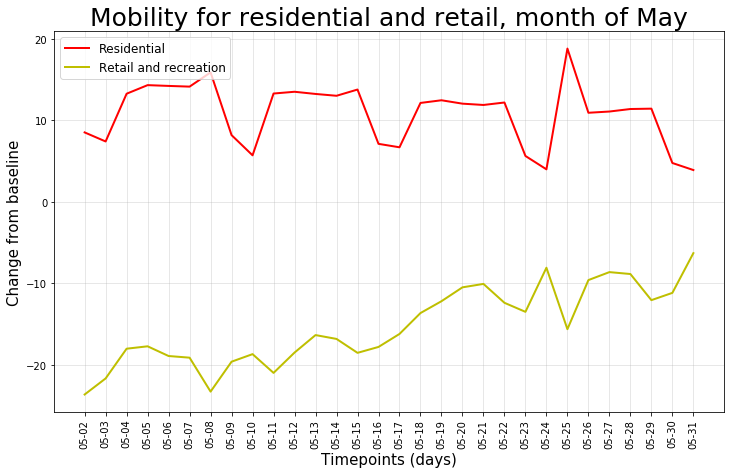

In [26]:
plt.plot(may_month_df["date"], 
         may_month_df["residential"],
         linewidth=2, label = "Residential", color="Red")

plt.plot(may_month_df["date"], 
         may_month_df["retail_and_recreation"],
         linewidth=2, label = "Retail and recreation", color="y")


# Adding title, x labels and y labels
plt.title("Mobility for residential and retail, month of May", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.xticks(rotation=90)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.rcParams['figure.figsize'] = [12, 7]
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_residential_and_retail.png", dpi = 100)
plt.show()

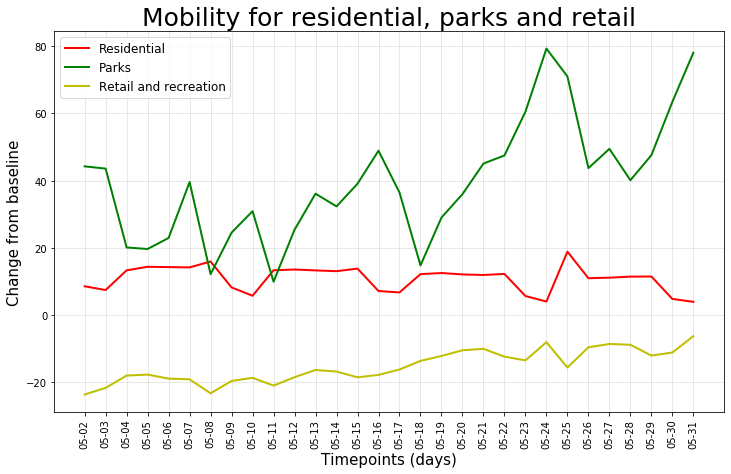

In [27]:
plt.plot(may_month_df["date"], 
         may_month_df["residential"],
         linewidth=2, label = "Residential", color="Red")

plt.plot(may_month_df["date"], 
         may_month_df["parks"],
         linewidth=2, label = "Parks", color="Green")

plt.plot(may_month_df["date"], 
         may_month_df["retail_and_recreation"],
         linewidth=2, label = "Retail and recreation", color="y")


# Adding title, x labels and y labels
plt.title("Mobility for residential, parks and retail", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.xticks(rotation=90)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.rcParams['figure.figsize'] = [12, 7]
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_residential_and_parks_retail.png", dpi = 100)
plt.show()

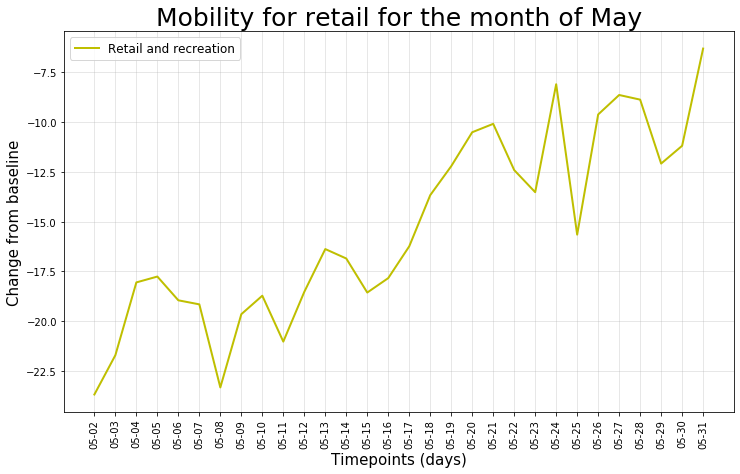

In [28]:
plt.plot(may_month_df["date"], 
         may_month_df["retail_and_recreation"],
         linewidth=2, label = "Retail and recreation", color="y")


# Adding title, x labels and y labels
plt.title("Mobility for retail for the month of May", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.xticks(rotation=90)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.rcParams['figure.figsize'] = [12, 7]
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_retail_motnh_of_May.png", dpi = 100)
plt.show()

In [29]:
# I wonder if the spikes, are for the actual weekends? We should further analyze that, 
# and if it confirms, it wll be an intresting observation. 
# Meaning when the stay at home, recommendation was issued, 
# people were respecting it and staying home, but were still like, Its weekend lets go out-or somewhere. 


#The chart bellow should be used to answer the question on peoples habits through the quarantine, meaning we were still more mobile/active for the weekends... Note, higher value means we were staying home more



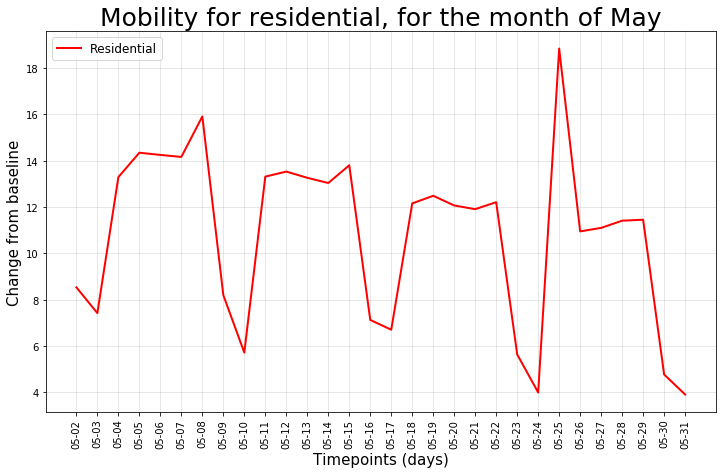

In [30]:
plt.plot(may_month_df["date"], 
         may_month_df["residential"],
         linewidth=2, label = "Residential", color="Red")


# Adding title, x labels and y labels
plt.title("Mobility for residential, for the month of May", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.xticks(rotation=90)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
plt.rcParams['figure.figsize'] = [12, 7]
plt.legend(loc = "upper left", fontsize = "large")
plt.savefig("Mobility_for_residential_May.png", dpi = 100)
plt.show()

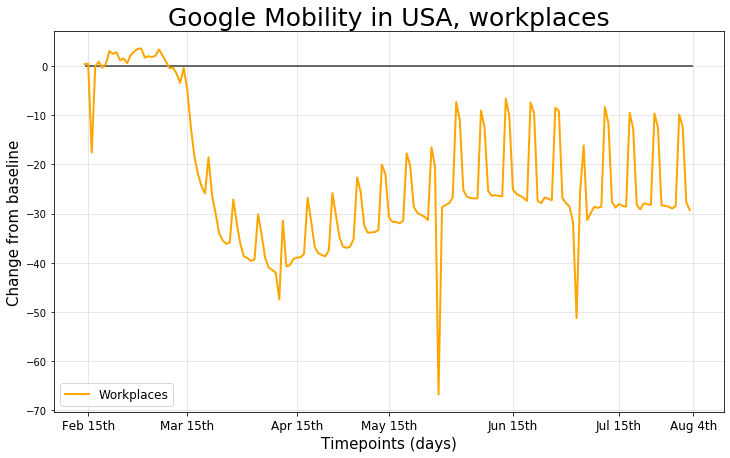

In [31]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["workplaces"],
         linewidth=2,
         c = "orange",
         label = "Workplaces")

# Adding title, x labels and y labels
plt.title("Google Mobility in USA, workplaces", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75)
plt.rcParams["figure.figsize"] = [12, 7]
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], 
           fontsize = "large")
plt.legend(loc = "lower left", fontsize = "large")
plt.savefig("Mobility_for_workplaces.png", dpi = 100)
plt.show()

In [32]:
# Additional data for furter praktice, 


# NY times has a free data, for covid cases, per state the file is in the data folder
# The path to the CSV file
file3 = "../Data/us-states.csv"

# Read the ny times covid data into pandas
nytimes_covid = pd.read_csv(file3)
nytimes_covid

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
8919,2020-08-11,Virginia,51,101745,2344
8920,2020-08-11,Washington,53,66620,1786
8921,2020-08-11,West Virginia,54,7875,147
8922,2020-08-11,Wisconsin,55,66146,1017


In [33]:
# The google data starts at 2020-02-15, so before merging, we will drop all the data from the nytimes before 2020-02-15
# locating the index of 2020-02-15, it will appear multiple times, but we only need the last one.
x = nytimes_covid.loc[nytimes_covid["date"] == "2020-02-15"].index[-1]
# x =np.arange(x)
nytimes_covidx = nytimes_covid.drop(np.arange(x))
nytimes_covid_clean = nytimes_covidx.drop(["fips"], axis = 1)
nytimes_covid_clean.rename(columns={"state":"State","cases": "Covid cases", "deaths":"Covid deaths"}, inplace =True)
nytimes_covid_clean

,date,State,Covid cases,Covid deaths
121,2020-02-15,Wisconsin,1,0
122,2020-02-16,Arizona,1,0
123,2020-02-16,California,7,0
124,2020-02-16,Illinois,2,0
125,2020-02-16,Massachusetts,1,0
...,...,...,...,...
8919,2020-08-11,Virginia,101745,2344
8920,2020-08-11,Washington,66620,1786
8921,2020-08-11,West Virginia,7875,147
8922,2020-08-11,Wisconsin,66146,1017


In [34]:
# Creating a dataframe that shows the total number of covid cases
covid_data_by_date_df = pd.DataFrame(nytimes_covid_clean.groupby("date").sum())
covid_data_by_date_df.reset_index(inplace = True)
covid_data_by_date_df

,date,Covid cases,Covid deaths
0,2020-02-15,1,0
1,2020-02-16,15,0
2,2020-02-17,25,0
3,2020-02-18,25,0
4,2020-02-19,25,0
...,...,...,...
174,2020-08-07,4950708,160977
175,2020-08-08,5005904,161942
176,2020-08-09,5054258,162481
177,2020-08-10,5101384,163018


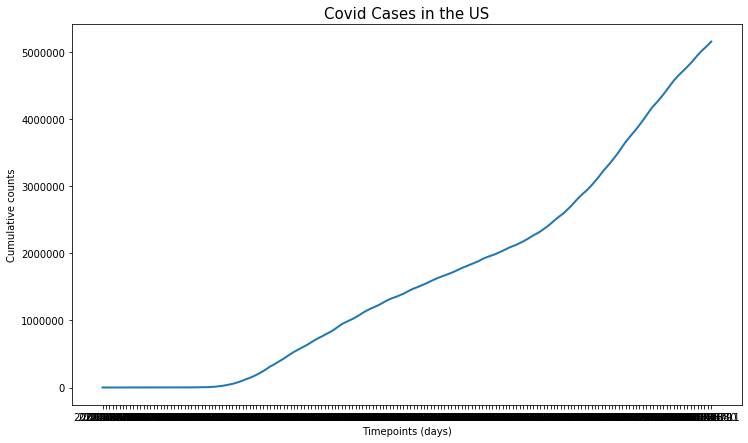

In [35]:
plt.plot(covid_data_by_date_df["date"], 
         covid_data_by_date_df["Covid cases"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Covid Cases in the US", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Cumulative counts")
plt.show()

In [36]:
# merging the two dataframes, just because. dont have an idea why, yet.
result = pd.merge(clean_google_mob_US_df, nytimes_covid_clean, how = "left", on=["date", "State"])
result

,State,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases,Covid deaths
0,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0,NaN,NaN
1,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0,NaN,NaN
2,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0,NaN,NaN
3,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0,NaN,NaN
4,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
456457,Wyoming,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN,2628.0,26.0
456458,Wyoming,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN,2686.0,26.0
456459,Wyoming,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN,2726.0,26.0
456460,Wyoming,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN,2848.0,27.0
